In [9]:

from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import imageio
import glob
import random



# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 


from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D

from keras.models import Model
from keras.models import Sequential




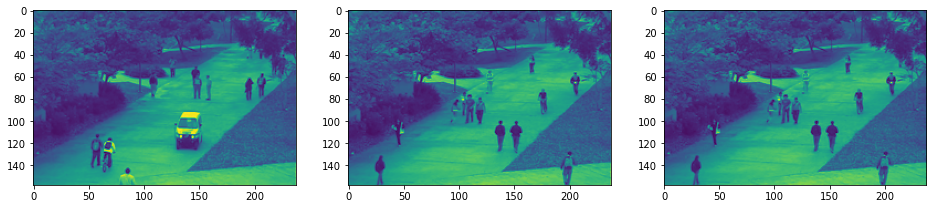

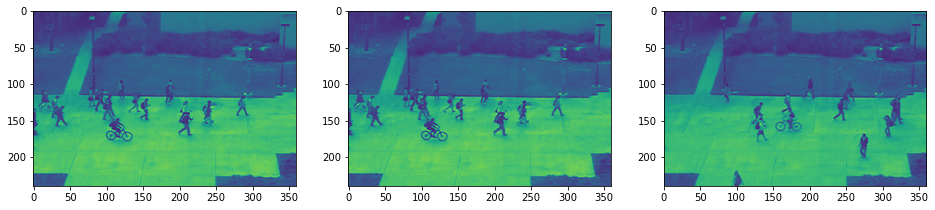

In [35]:


img1 = imageio.imread('C:/dat/data/anomallytest/train/abnormal/1.tif')
img2 = imageio.imread('C:/dat/data/anomallytest/train/abnormal/2.tif')
img3 = imageio.imread('c:/dat/data/anomallytest/train/abnormal/3.tif')
img4 = imageio.imread('c:/dat/data/anomallytest/train/abnormal/10.tif')
img5 = imageio.imread('c:/dat/data/anomallytest/train/abnormal/11.tif')
img6 = imageio.imread('c:/dat/data/anomallytest/train/abnormal/12.tif') 

fig, axes = plt.subplots(1,3,figsize = (16,16))
axes[0].imshow(img1);
axes[1].imshow(img2);
axes[2].imshow(img3);





fig, axes1 = plt.subplots(1,3,figsize = (16,16))
axes1[0].imshow(img4)
axes1[1].imshow(img5)
axes1[2].imshow(img6)



In [10]:
img_height, img_width =(158,234)
batch_size = 16

train_data_dir= "C:/dat/data/anomallytest/train"
valid_data_dir ="C:/dat/data/anomallytest/val"
test_data_dir ="C:/dat/data/anomallytest/test"


In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=0.4)



train_generator =train_datagen.flow_from_directory(
   train_data_dir,
   target_size = (img_height,img_width),
   batch_size= batch_size,
   class_mode='categorical',
   subset='training')




Found 1788 images belonging to 2 classes.


In [12]:
valid_generator =train_datagen.flow_from_directory(
   valid_data_dir,
   target_size = (img_height,img_width),
   batch_size= batch_size,
   class_mode='categorical',
   subset='validation')

Found 240 images belonging to 2 classes.


In [13]:
test_generator =train_datagen.flow_from_directory(

           test_data_dir,
           target_size = (img_height,img_width),
           batch_size = 1,
           class_mode='categorical',
           subset='validation')


x,y = test_generator.next()
x.shape








Found 240 images belonging to 2 classes.


(1, 158, 234, 3)

In [15]:
base_model = ResNet50(include_top=False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(train_generator.num_classes,activation='sigmoid')(x)
model = Model(inputs=base_model.input,outputs=predictions)


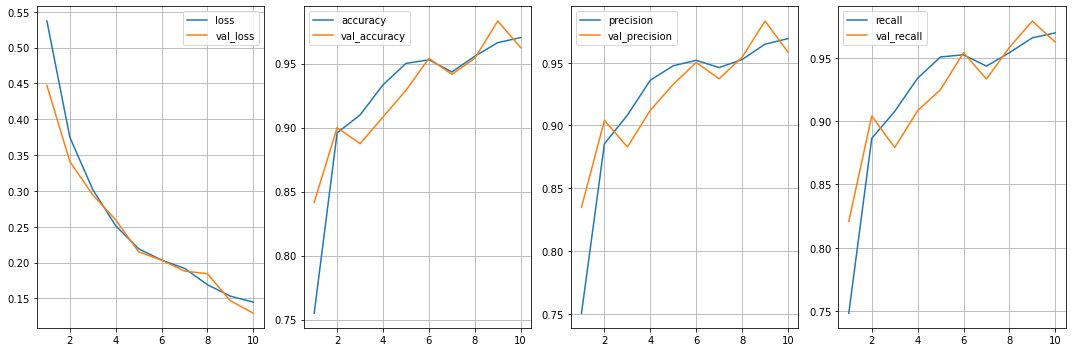

112/112 [==============================] - 367s 3s/step - loss: 0.1448 - accuracy: 0.9704 - precision: 0.9693 - recall: 0.9698 - val_loss: 0.1294 - val_accuracy: 0.9625 - val_precision: 0.9585 - val_recall: 0.9625


In [16]:
from tensorflow import keras
from IPython.display import clear_output

for layer in base_model.layers:
     layer.trainable = False
        

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()


callbacks_list = [PlotLearning()]
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
model.fit(train_generator,epochs = 10,batch_size = 16,validation_data=valid_generator,callbacks=callbacks_list)




#model.fit(train_generator,epochs = 1)


In [21]:
output=model.predict(test_generator)

In [ ]:
test_acc =model.evaluate(test_generator,verbose=2)
print('Loss :' , test_acc[0])

In [ ]:
print('Test accuracy :' , test_acc[1])

In [ ]:
print('Test Recall :' , test_acc[2])

In [ ]:
print('Test Precision :' , test_acc[3])